### Исследование файла и уравнений

In [1]:
with open("THERM.DAT", "r", encoding="UTF-8") as file:
        head = [next(file) for x in range(4)]
        for line in head:
            print(line)

Ag cr REF ELEMENT T 6/12AG 1.   0.   0.   0.S   200.000  1235.080 1000.        1

 2.07216824E+00 2.46393729E-03-1.34351116E-06 3.69321107E-10 0.00000000E+00    2

-6.37725170E+02-7.18810718E+00 2.25225065E+00 5.43263008E-03-1.32153990E-05    3

 1.50423505E-08-5.94991675E-12-8.23132027E+02-8.86835190E+00 0.00000000E+00    4



### Задача: распарсить файл по принципу:

`{"Ag" : [2.07216824E+00, 2.46393729E-03, -1.34351116E-06, 3.69321107E-10, 0.00000000E+00, -6.37725170E+02, -7.18810718E+00, 2.25225065E+00, 5.43263008E-03, -1.32153990E-05, 1.50423505E-08, -5.94991675E-12, -8.23132027E+02, -8.86835190E+00, 0.00000000E+00]}`

In [2]:
import json

In [3]:
def read_four_lines(f):
    first = f.readline()
    second = f.readline()
    third = f.readline()
    fourth = f.readline()
    return (first, second, third, fourth)

In [4]:
def parse_quadruple(q):
    element = q[0][0:q[0].index(' ')] #Надо очистить это от лишних символов (1,2-C2H2F2-cis)
    element = element.replace("*", "").replace("=", "")
    i1 = element.find("-")
    if i1 != -1:
        element = element[i1:]
    i2 = element.find("-")
    if i2 != -1:
        element = element[:i2]
    #C2H2F2
    meta = q[0][18:26]
    full_name = q[0][0:17].strip()
    coefs = []
    stride = 15
    for i in range(1, 4):
        for j in range(0, 5):
            raw_data = q[i][j*stride:(j+1)*stride]
            try:
                data = float(raw_data)
            except ValueError:
                data = float(0)
            coefs += [data]
    element_data = {element : {"coeffs" : coefs, "full_name" : full_name, "meta" : meta}}
    return element_data

In [5]:
with open("THERM.DAT", "r", encoding="UTF-8") as file:
    q = read_four_lines(file)
    print(parse_quadruple(q))

{'Ag': {'coeffs': [2.07216824, 0.00246393729, -1.34351116e-06, 3.69321107e-10, 0.0, -637.72517, -7.18810718, 2.25225065, 0.00543263008, -1.3215399e-05, 1.50423505e-08, -5.94991675e-12, -823.132027, -8.8683519, 0.0], 'full_name': 'Ag cr REF ELEMENT', 'meta': 'T 6/12AG'}}


In [6]:
result = {}
with open("THERM.DAT", "r", encoding="UTF-8") as file:
    for i in range(0, 2972): #Я вручную посчитал сколько там должно быть элементов
        q = read_four_lines(file)
        buf = parse_quadruple(q)
        result.update(buf)
parsed_to_json = json.dumps(result, indent=4)

In [7]:
print(result["H2"])

{'coeffs': [2.93286575, 0.000826608026, -1.46402364e-07, 1.54100414e-11, -6.888048e-16, -813.065581, -1.02432865, 2.34433112, 0.00798052075, -1.9478151e-05, 2.01572094e-08, -7.37611761e-12, -917.935173, 0.683010238, 0.0], 'full_name': 'H2 REF ELEMENT', 'meta': 'tpis78H '}


In [8]:
with open("parsed.json", "w", encoding="UTF-8") as file:
    file.write(parsed_to_json)

Повторение примера из презентации

Материальная независимость:
    O O2 H H2 OH H 2O N2 NO

In [9]:
a = [[1, 2, 0, 0, 1, 1, 0, 1],
      [0, 0, 1, 2, 1, 2, 0, 0],
      [0, 0, 0, 0, 0, 0, 2, 1]]

In [10]:
b = [[14.258],
     [27.948],
     [53.097]]

(Разделить элементы и их количества)

In [11]:
formulas = ["O", "O2", "H", "H2", "OH", "H2O", "N2", "NO"]

In [12]:
from chemparse import parse_formula

In [13]:
parsed_formulas = [parse_formula(x) for x in formulas]

(Вычисление масс для смесей)

In [14]:
import mendeleev

In [15]:
masses = []
for formula in parsed_formulas:
    mass = 0
    for atom, count in formula.items():
        mass += mendeleev.element(atom).atomic_weight * count
    masses += [mass]

In [16]:
print(masses)

[15.999, 31.998, 1.008, 2.016, 17.007, 18.015, 28.014, 30.006]


(Вычисление газовых постоянных)

In [17]:
R0 = 8.31446261815324e3

In [18]:
R = [R0/x for x in masses]

In [19]:
print(R)

[519.6863940342047, 259.84319701710234, 8248.47481959647, 4124.237409798235, 488.88473088453225, 461.52998157941937, 296.7966951578939, 277.09333527138705]


Уравнение состояния:

Моделируется случай при заданных p, I: нагрев рабочего тела (горение топлива) при заданном давлении

In [20]:
p = 1e5
T = 2500
m = 1
v = 1

In [21]:
pv = p * v

In [22]:
import numpy as np

In [23]:
coefs_state = [R_ * T for R_ in R] 

In [24]:
coefs = np.array(a + [coefs_state])
free_members = np.array(b + [[pv]])

In [25]:
print(coefs, free_members, sep="\n")

[[1.00000000e+00 2.00000000e+00 0.00000000e+00 0.00000000e+00
  1.00000000e+00 1.00000000e+00 0.00000000e+00 1.00000000e+00]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00 2.00000000e+00
  1.00000000e+00 2.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 2.00000000e+00 1.00000000e+00]
 [1.29921599e+06 6.49607993e+05 2.06211870e+07 1.03105935e+07
  1.22221183e+06 1.15382495e+06 7.41991738e+05 6.92733338e+05]]
[[1.4258e+01]
 [2.7948e+01]
 [5.3097e+01]
 [1.0000e+05]]


Решение модели (замена x на e^x, чтобы не было отрицательных значений)

In [26]:
from scipy.special import softmax
from scipy.optimize import fsolve, minimize, least_squares
from scipy.linalg import norm

In [27]:
def functions(inputs):
    rows = [row * np.exp(inputs) for row in coefs]
    result = np.array([np.sum(row) - free_member[0] for row, free_member in zip(rows, free_members)])
    return result

In [28]:
x = np.ones((coefs.shape[1],)) / coefs.shape[1]
x = least_squares(functions, x)
result_softmax = softmax(x.x)
result_linear = x.x / norm(x.x)
#print(x.x)
print(result_softmax)
#print(result_linear)

[9.98662561e-03 2.68663783e-02 5.84684323e-04 1.20561894e-03
 1.30203012e-02 1.83261552e-02 8.75659690e-01 5.43505468e-02]


In [29]:
known_coefs = [0.0012079, 0.0069651, 0.0037482, 0.0221819, 0.0108852, 0.3136454, 0.6375936, 0.0037636]

In [30]:
corr = np.corrcoef(result_softmax, known_coefs)

In [31]:
print(corr)

[[1.         0.88660402]
 [0.88660402 1.        ]]


In [32]:
from scipy import stats

In [33]:
corr = stats.pearsonr(result_softmax, known_coefs)
print(corr)

(0.8866040239375056, 0.0033423066932568115)


In [34]:
from sklearn.metrics import mean_absolute_error

In [35]:
print(mean_absolute_error(result_softmax, known_coefs))

0.07986589788706729


In [36]:
import matplotlib.pyplot as plt

<BarContainer object of 8 artists>

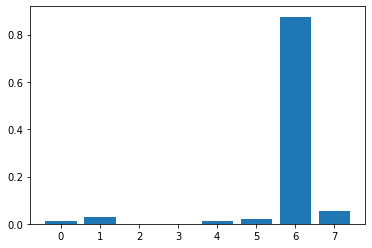

In [37]:
plt.bar(range(len(result_softmax)), result_softmax)

<BarContainer object of 8 artists>

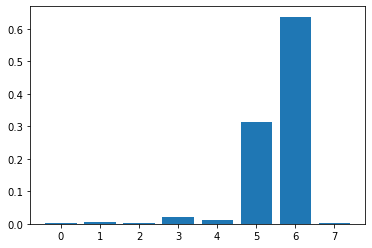

In [38]:
plt.bar(range(len(result_softmax)), known_coefs)

Коэффициент корелляции равен 0.8817, p-мера, показывающая достоверность корелляции равна 0.0037. Если p-мера меньше 0.05, то корелляция достоверна

Вычислим все то же самое, но без уравнения состояния

In [39]:
coefs = np.array(a)
free_members = np.array(b)

In [40]:
x = np.ones((coefs.shape[1],)) / coefs.shape[1]
x = least_squares(functions, x)
result_softmax = softmax(x.x)
result_linear = x.x / norm(x.x)
print(result_softmax)
corr = stats.pearsonr(result_softmax, known_coefs)
print(corr)

[0.02486154 0.02422317 0.04611266 0.12304184 0.04684101 0.13280095
 0.54660486 0.05551398]
(0.9399813238076826, 0.0005164661987221236)


In [41]:
print(mean_absolute_error(result_softmax, known_coefs))

0.06795943369719945


<BarContainer object of 8 artists>

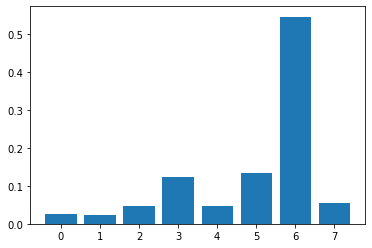

In [42]:
plt.bar(range(len(result_softmax)), result_softmax)

<BarContainer object of 8 artists>

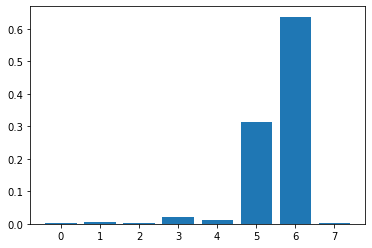

In [43]:
plt.bar(range(len(result_softmax)), known_coefs)